In [3]:
import pandas as pd
import numpy as np
import os
import sys
import Mixture
import multiprocessing

#Library to read RDS format
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

ModuleNotFoundError: No module named 'rpy2'

In [2]:
print('Num cores: ' + str(multiprocessing.cpu_count()))

cores = 4
iters = 1000
output = 'outputBetas'

if cores > multiprocessing.cpu_count():
    cores = multiprocessing.cpu_count()

Num cores: 4


In [3]:
# Read xlsx files
X = pd.read_excel('data/LM22Signature.xlsx', sheet_name = 0) 

In [2]:
# Read RDS file
readRDS = robjects.r['readRDS']
df = readRDS('data/betas.list.rds')
with localconverter(robjects.default_converter + pandas2ri.converter):
    df = robjects.conversion.rpy2py(df)
    
subject = df

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
Y = pd.DataFrame(np.column_stack(vector), columns=columns)
Y.insert(0, 'Gene symbol', df[0][2].rownames)

NameError: name 'robjects' is not defined

In [ ]:
# Run Mixer Function
if __name__ == '__main__':
    result, pValues = Mixture.Mixture(X, Y , cores, iters, output)

In [1]:
result

NameError: name 'result' is not defined

In [5]:
# Getting Real Betas Matrix
vector = [x[0] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
Betas = pd.DataFrame(np.column_stack(vector), columns=columns)

In [6]:
def blandAltman (betas, result):
    betahat = result.Subjects[0].MIXprop[0].T.to_numpy(copy=True)
    betahat = betahat.flatten()
    
    betasim = betas.to_numpy(copy=True)
    betasim = betasim.flatten()
    
    df = pd.DataFrame(np.transpose([betahat, betasim, (betahat - betasim)]), columns = ['betahat', 'betasim', 'difs'])
    summary = pd.DataFrame([[np.mean(df.difs),np.std(df.difs),np.min(df.difs),np.max(df.difs)]], columns = ['mn', 'sd', 'mi', 'mx'])
    return df, summary
       

In [7]:
ba, summary = blandAltman (Betas, result)

In [8]:
def blandAltamGraph(ba, summary):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(ba.betasim, ba.difs, 'k.')
    plt.xlabel('Beta Sim')
    plt.ylabel('Difs')
    ax.axhline(summary.mn[0])
    ax.axhline(summary.mn[0]+2*summary.sd[0])
    ax.axhline(summary.mn[0]-2*summary.sd[0])

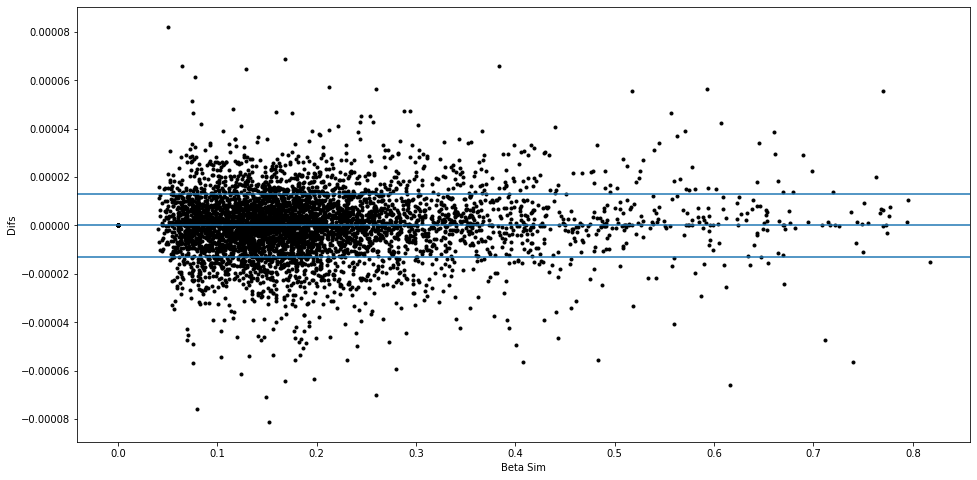

In [9]:
blandAltamGraph(ba, summary)